# Lab Assignment 6: Classification Problem

**Remember to follow the principles of the rubric we developed:**

1. Clarity/Comments
2. Accuracy
3. Typos
4. Grammar/Syntax


# Introduction

This lab uses the MNIST dataset to build a classification problem.

The MNIST (Modified National Institute of Standards and Technology) database contains 70,000 handwritten digits (0-9), divided into training and testing sets of 60,000 digits and 10,000 digits respectively. It is widely used in training for machine learning and practicing classification problems, as we will do in this lab. The digits are grayscaled images that are 28x28 pixels and associated with corresponding number labels. They are stored as NumPy arrays.

Our goal is to build a neural network which can associated to an image the correct corresponding number label.


# Setup

The easiest way to load the MNIST dataset is with Keras. Keras is another library similar to PyTorch used for writing machine learning in Python. We will work with Keras in this lab instead of PyTorch. Some differences between the two, as well as information about how to use Keras, is outlined in the links below.

https://www.datacamp.com/tutorial/pytorch-vs-tensorflow-vs-keras

https://www.datacamp.com/tutorial/deep-learning-python

https://www.datacamp.com/cheat-sheet/keras-cheat-sheet-neural-networks-in-python

In [3]:
# IMPORT NECESSARY LIBRARIES

import numpy as np
import keras
from keras.models import Sequential

# The Sequential class is a linear stack of layers. We use it to build the neural network.
# Each layer has 1 input and 1 output tensor.
# The layers are connected sequentially, and data flows in the order they are added to the model
# Sequential layers automatically adjust the shape of a layer's input based on the output of the layer before it


from keras.layers import Dense, Flatten, Dropout

# keras.models contains big picture information about the structure of a network,
# whereas keras.layers contains information about specific layers used in the model.

# The Dense layer is fundemental in building a network with Keras. It means every layer is connected to the one before and after it.
# The Flatten layer is used to convert multidimension data to 1D.
# The Dropout layer is used to avoid overfitting of the network. The dropout rate is a hyperparameter

import matplotlib.pyplot as plt
%matplotlib inline
# makes plot appear without plt.show

from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0) #constant results everytime, don't change because of the randomness


# Data Exploration

load the MNIST dataset, explore characteristics (shape)

Display sample images with labels



In [ ]:
# load and download dataset from Keras

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# find and print the shape of the training data:

# find and print the shape of the testing data:


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**How can you interpret the shape of the training and testing data? Why is the x-shape different than the y-shape? What are the different dimensions of the x-shape representing?**

*Your answer text here*

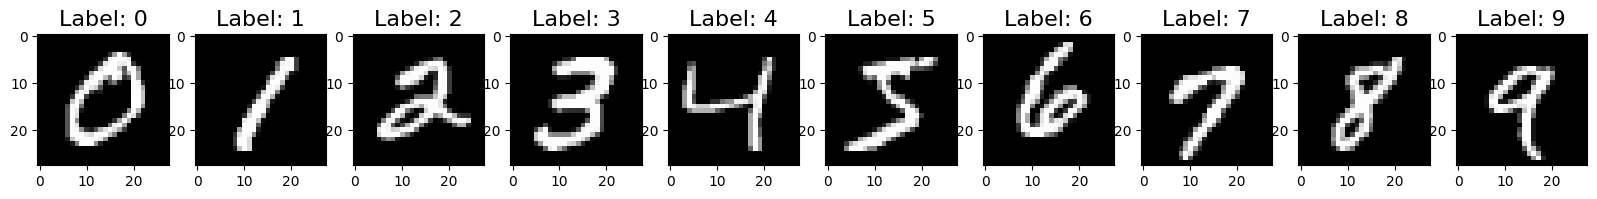

In [ ]:
# in a classification problem, we have a certain number of "classes", or labels
# which the network is trained to recognize.
# determine the number of classes in this problem:

num_classes =

# Visualizing examples from the dataset

f, ax = plt.subplots(1, num_labels, figsize=(20,20))

for i in range(0, num_labels):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# Data Preprocessing

Now that we have loaded our data, we need to process the images to make them easier to work with before using them to train the network. Images, when viewed through a computer, are essentially matrices (which is why the MNIST images are stored as NumPy arrays). We talk about the number of channels an image has, which refers to how many numbers describe a pixel. For example, most colour images have three channels, which tell us how much red, blue, and green are in each pixel. Grayscale images (black and white, like MNIST) are one channel, which tells us how much white is in each pixel. Most often, pixel values are are integers between 0 and 255. We normalize these values to be between 0 and 1.

In [ ]:
# Normalize x_train and x_test:

**Why don't we need to normalize y_train and y_test?**

*Your answer text here*

In [ ]:
# Reshape x_train and x_test data into a 1D array using the .reshape() command:

x_train = x_train.reshape(x_train.shape[0], -1)

# Use .shape[0] to extract the size of the first dimension (labeled 0 in Python)
# What is the first dimension in this case? Think about the earlier question about the shape of x_train and y_train.
# -1 when used in reshaping is a placeholder which indicates that the size of that dimension
# should be automatically calculated based on the size of the original data.

x_test =

# print the resulting shapes of x_train and x_test:


**Why don't we need to reshape y_train and y_test?**

*Your answer text here*

Now we need to discretize the y_train and y_test data, otherwise the network may classify an image which it can't recognize as a non-integer value.

In [ ]:
# Discretizing y_train
y_train = keras.utils.to_categorical(y_train, num_classes)

for i in range(10):
  print(y_train[i])

# Discretize y_test:

**Can you explain the resulting matrices? What do the 1s and 0s represent in each row?**

*Your answer text here*

https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/

Note that preprocessing sometimes includes dividing your data into training and testing sets. However, we did this when we loaded the data.

# Model Setup

In [1]:
#Initialize the sequential model:
model = Sequential()

#Add layers one by one to the model. The data will feedforward in the order they are added
#We use Dense layers
#We define the number of "units" (neurons) and the activation function for each layer.
#For the first layer, we define the input shape

model.add(Dense(units=128, input_shape=(784,), activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))

model.add(Dropout(0.25))
# The Dropout layer randomly drops neurons (units) from training
# It does this by setting their inputs to 0
# This prevents overfitting
# Here, the model drops 25% of neurons. Try to change this parameter to see what happens

model.add(Dense(units=10, activation='softmax'))
# We use softmax as the final activation function, as is common for multi-class problems
# Softmax converts raw model output into probabilities for each class

# Now we compile the layers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Categorical cross entropy is a loss function analogous to the binary cross entropy, but for multi-class problems
# Adam is the typical optimizer used for gradient descent (as outlined in previous labs)
# metrics=['accuracy'] tells the model we want to monitor accuracy as our evaluation metric
  #as opposed to precision, recall, etc...

# generate a model summary:
model.summary()

NameError: ignored

**Why is the input shape (784,)?**

*Your answer text here*

**Try changing the number of units, the activation function in the first and second layers, and the fraction of neurons dropped in the Dropout layer. Record what you changed, and what the effect was in training.**

*Your answer text here*

# Model Training



In [ ]:
# Define the batch size and number of epochs:

batch_size =
epochs =

#Train the network:
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

**Explain what batch size and epochs are**

*Your answer text here*

**Describe the trends you are seeing as the model trains**

*Your answer text here*

# Model Evaluation

After we train the model on our training dataset, we evaluate the accuracy of the trained model on our testing dataset.

In [ ]:
# Use the model.evaluate() to run the model on our testing dataset.
# It will output two values, the loss value, and the accuracy metric

test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the loss and accuracy for the test data:


We can use the model to make predictions from input data.

In [ ]:
#Use the trained model to predict outputs using the x_test data:
y_pred = model.predict()
# y_pred is a matrix, where each row is a sample from x_test. What are the columns?

# Find the max value along each column of y_pred:
y_pred_classes = np.argmax(y_pred, axis=1)

#Print both y_pred and y_pred_classes

**What do the columns of y_pred represent? How does visualizing y_pred next to y_pred_classes help us to deduce the answer? What do the values in y_pred_classes represent?**

*Your answer text here*

# Visualization

Now we want to see how model work on an example datapoint from x_test.

In [ ]:

# "index" - shortened to idx - refers to the position of an element in an array
# We choose randomly an index within x_test, locating a particular sample in the x_test array
# What should the size of our array be? Hint: you will need to use the length command len():

random_idx = np.random.choice(#?)

# Call the data from the randomly selected sample:
x_sample = x_test[random_idx]

# Define what the true outputs are (labels)
# We do this by finding the maximum probability of each label:
y_true = np.argmax(y_test, axis=1)

# for our sample, chosen with random_idx, we define the true label:
y_sample_true = y_true[random_idx]

# Call the output (label) which the model predicted for the sample indexed by random_idx
y_sample_pred_class = y_pred_classes[random_idx]

# Show the input (image) and predicted label (output)
plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')

**Was your network's prediction correct?**

*Your answer text here*

# Confusion Matrix

A confusion matrix is a tool used to evaluate how well a model is classifying data.

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [2]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot =True, fmt='d', ax=ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label:')
ax.set_ylabel('True Label:')
ax.set_title('Confusion Matrix:');

NameError: ignored

**Run the code provided, and try to interpret the confusion matrix. What information can we gather from it? Explain with specific examples what the values in the table represent.**

*Your answer text here*

# Extension

If you feel you need an extra challenge, try to write a code which can identify samples that the model labelled incorrectly. Remember, this will occur when (Value of Predicted Outcomes) - (Value of True Outcomes) ≠ 0. Display a few images that the model could not classify, and theorize about why that may be, and how we could adjust our model to eliminate errors. You do not need to rebuild the model, but just make a few suggestions.

# What if training dataset is biased?

Preprocessing training dataset to make new training *dataset* just include single digit type "1".

In [ ]:
indices_of_1 = np.where(np.argmax(y_train, axis=1) == 1)[0] 
x_train_1 = x_train[indices_of_1]
y_train_1 = y_train[indices_of_1]

print("Shape of new x_train:", x_train_1.shape)
print("Shape of new y_train:", y_train_1.shape)

Construct a new network for training.

In [ ]:
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model using the new biased dataset


In [ ]:
model.fit(x=x_train_1, y=y_train_1, batch_size=batch_size, epochs=epochs)

Test the model.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Visulize the result using confusion matrix.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix for Biased Model');

**Interpret this confusion matrix. What happened when the training dataset just have one type of digit?**

*Write your answer here.*